In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
air_csv = pd.read_csv('openaq.csv', sep=';')

In [3]:
air_csv.head(10)

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,DE,Manfred Lotz,"Cottbus, W.-Külz-Str.","51.75413,14.325549",PM2.5,EEA Germany,µg/m³,21.70,2016-12-21T12:00:00+01:00,Germany
1,ES,Castellón/Castelló,ES1969A,"39.8236111095,-0.24444444",NO2,EEA Spain,µg/m³,1.00,2021-07-13T08:00:00+02:00,Spain
2,ES,Valencia/València,ES1885A,"39.4802777695,-0.33638888",SO2,EEA Spain,µg/m³,5.00,2021-08-06T11:00:00+02:00,Spain
3,ES,Alicante/Alacant,ES2008A,"37.9911111095,-0.69",PM2.5,EEA Spain,µg/m³,9.00,2021-08-06T11:00:00+02:00,Spain
4,ES,Alicante/Alacant,ES1968A,"38.3511111095,-0.51388888",PM10,EEA Spain,µg/m³,1.00,2021-08-06T11:00:00+02:00,Spain
5,ES,Valencia/València,ES1911A,"39.7052777695,-0.33666666",CO,EEA Spain,µg/m³,100.00,2021-08-06T11:00:00+02:00,Spain
6,ES,Valencia/València,ES1185A,"39.6672222195,-0.23472222",PM10,EEA Spain,µg/m³,13.00,2021-08-06T11:00:00+02:00,Spain
7,ES,Alicante/Alacant,ES1849A,"38.2591666595,-0.7175",CO,EEA Spain,µg/m³,100.00,2021-08-06T11:00:00+02:00,Spain
8,ES,Almería,ES1835A,"36.9499999995,-1.96148",CO,EEA Spain,µg/m³,417.00,2021-08-06T09:00:00+02:00,Spain
9,ES,Málaga,ES1750A,"36.7196399995,-4.4475",PM10,EEA Spain,µg/m³,34.56,2021-08-06T08:00:00+02:00,Spain


In [4]:
air_csv['Day Updated']=pd.to_datetime(air_csv['Last Updated'].str[:10], format='%Y-%m-%d')

In [5]:
air_csv.drop(columns='Last Updated', inplace=True)

In [6]:
air_csv = air_csv.loc[air_csv['Day Updated']=="2021-08-06"]
air_csv.reset_index(drop=True, inplace=True)
air_csv.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Country Label,Day Updated
0,ES,Valencia/València,ES1885A,"39.4802777695,-0.33638888",SO2,EEA Spain,µg/m³,5.0,Spain,2021-08-06
1,ES,Alicante/Alacant,ES2008A,"37.9911111095,-0.69",PM2.5,EEA Spain,µg/m³,9.0,Spain,2021-08-06
2,ES,Alicante/Alacant,ES1968A,"38.3511111095,-0.51388888",PM10,EEA Spain,µg/m³,1.0,Spain,2021-08-06
3,ES,Valencia/València,ES1911A,"39.7052777695,-0.33666666",CO,EEA Spain,µg/m³,100.0,Spain,2021-08-06
4,ES,Valencia/València,ES1185A,"39.6672222195,-0.23472222",PM10,EEA Spain,µg/m³,13.0,Spain,2021-08-06


In [7]:
print(air_csv.isnull().sum())

Country Code      0
City             83
Location          1
Coordinates       8
Pollutant         0
Source Name       0
Unit              0
Value             0
Country Label    10
Day Updated       0
dtype: int64


In [8]:
air_csv=air_csv.dropna()

In [9]:
print(air_csv.isnull().sum())

Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Country Label    0
Day Updated      0
dtype: int64


In [10]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha())

In [11]:
only_roman_chars(air_csv['City'][0])

True

In [12]:
air_csv.head()


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Country Label,Day Updated
0,ES,Valencia/València,ES1885A,"39.4802777695,-0.33638888",SO2,EEA Spain,µg/m³,5.0,Spain,2021-08-06
1,ES,Alicante/Alacant,ES2008A,"37.9911111095,-0.69",PM2.5,EEA Spain,µg/m³,9.0,Spain,2021-08-06
2,ES,Alicante/Alacant,ES1968A,"38.3511111095,-0.51388888",PM10,EEA Spain,µg/m³,1.0,Spain,2021-08-06
3,ES,Valencia/València,ES1911A,"39.7052777695,-0.33666666",CO,EEA Spain,µg/m³,100.0,Spain,2021-08-06
4,ES,Valencia/València,ES1185A,"39.6672222195,-0.23472222",PM10,EEA Spain,µg/m³,13.0,Spain,2021-08-06


In [13]:
# j'ai voulu enlever tout ce qui n'était pas écrit en alphabet latin. La fonction fonctionne bien mais..

try:
    for i in range(len(air_csv)):
        if only_roman_chars(air_csv['City'][i])== False:  # je ne comprends pas pourquoi cela ne marche pas dans la boucle.. 
            #print ("bouh")
            air_csv['City'][i] = np.NaN
except TypeError:
    # The object is not iterable
    # <class 'float'>
    print('The object is not iterable')

/var/folders/6x/09gt1_4144s66tbhtxry62f40000gn/T/ipykernel_69206/756271789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_csv['City'][i] = np.NaN


KeyError: 369

In [14]:
if only_roman_chars(air_csv['City'][62]) == True:
    print ('yeah')

yeah


In [15]:
air_csv.iloc[368]

Country Code                      NL
City                        Den Haag
Location           Den Haag-Veerkade
Coordinates          52.0751,4.31587
Pollutant                        NO2
Source Name              Netherlands
Unit                           µg/m³
Value                          10.57
Country Label            Netherlands
Day Updated      2021-08-06 00:00:00
Name: 368, dtype: object

In [16]:
print(air_csv.isnull().sum())

Country Code      0
City             75
Location          0
Coordinates       0
Pollutant         0
Source Name       0
Unit              0
Value             0
Country Label     0
Day Updated       0
dtype: int64


In [17]:
air_csv=air_csv.dropna()
cities= air_csv.groupby('City').nunique()
cities

,Country Code,Location,Coordinates,Pollutant,Source Name,Unit,Value,Country Label,Day Updated
City,,,,,,,,,
037,1,1,1,1,1,1,1,1,1
ADA,1,1,1,1,1,1,1,1,1
ADAIR,1,1,1,5,1,2,5,1,1
ADAMS,1,2,2,2,1,1,3,1,1
ALAMEDA,1,1,1,5,1,2,5,1,1
...,...,...,...,...,...,...,...,...,...
黔东南苗族侗族自治州,1,2,2,6,1,1,10,1,1
黔南布依族苗族自治州,1,2,2,6,1,1,10,1,1
黔西南布依族苗族自治州,1,2,2,6,1,1,11,1,1


In [18]:
pollutant_unit = air_csv.groupby(["Pollutant","Unit"]).size()
pollutant_unit

Pollutant  Unit 
BC         µg/m³      83
CO         ppm       321
           µg/m³    2315
NO2        ppm       464
           µg/m³    4325
O3         ppm      1487
           µg/m³    3511
PM10       µg/m³    4205
PM2.5      µg/m³    4199
SO2        ppm       445
           µg/m³    2762
dtype: int64

In [19]:
air_csv = air_csv.loc[~((air_csv["Pollutant"] == "CO") & (air_csv["Unit"] == "ppm"))]
air_csv = air_csv.loc[~((air_csv["Pollutant"] == "NO2") & (air_csv["Unit"] == "ppm"))]
air_csv = air_csv.loc[~((air_csv["Pollutant"] == "O3") & (air_csv["Unit"] == "ppm"))]
air_csv = air_csv.loc[~((air_csv["Pollutant"] == "SO2") & (air_csv["Unit"] == "ppm"))]

pollutant_unit = air_csv.groupby(["Pollutant","Unit"]).size()
pollutant_unit

Pollutant  Unit 
BC         µg/m³      83
CO         µg/m³    2315
NO2        µg/m³    4325
O3         µg/m³    3511
PM10       µg/m³    4205
PM2.5      µg/m³    4199
SO2        µg/m³    2762
dtype: int64

<Axes: >

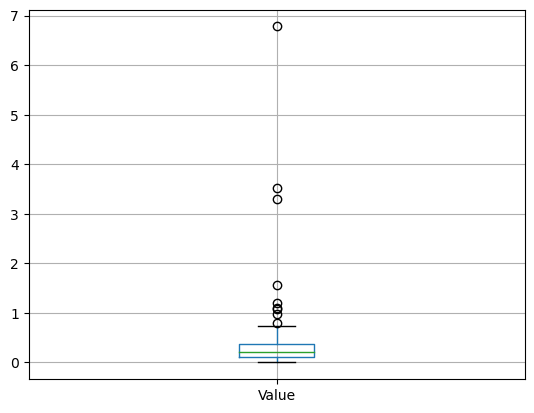

In [20]:
air_csv_bc = air_csv.loc[(air_csv["Pollutant"] == "BC")]
air_csv_bc.boxplot(column=["Value"])

#### On peut réaliser cette mesure sur tous les polluants de la base. Toutes les valeurs en dehors (et à fortiori très en dehors) de la boîte à moustaches peuvent être considérées comme extrêmes.

In [24]:
air_csv.to_csv('air_quality_clean.csv')